## Install Dependencies

In [1]:
%pip install matplotlib

import numpy as np
from matplotlib import pyplot as plt
from statistics import mean, median


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
def printb(text: str) -> None:
    print("\033[1m" + text + "\033[0m")

## Load result data

In [3]:
import json 

with open("experiment_gate_sim_results.json", "r") as results_file:
    experiments = json.load(results_file)

In [4]:
qubit_nums = list(experiments.keys())
print(f"Available qubit nums: {qubit_nums}")

Available qubit nums: ['3', '4', '5', '6', '7', '8']


In [5]:
target_dir = "results_gate_sim" # Used for storing plots

## Create Plots for Simulation Duration per Gate

Simulation durations of gates for 3 qubits:


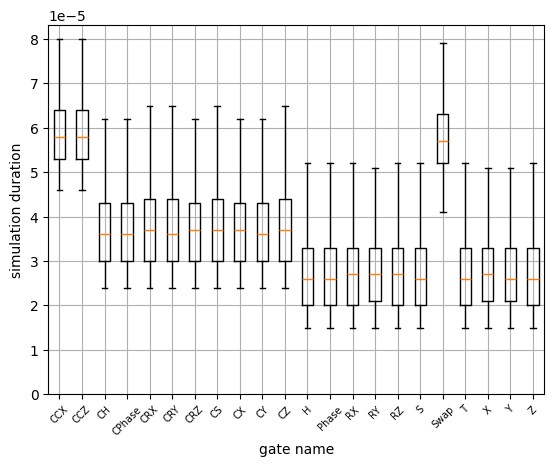

Simulation durations of gates for 4 qubits:


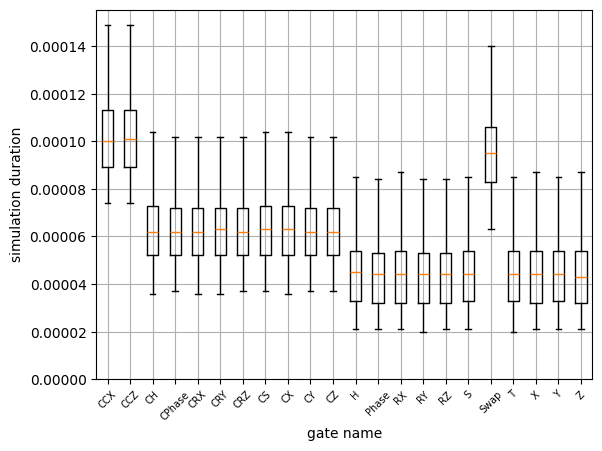

Simulation durations of gates for 5 qubits:


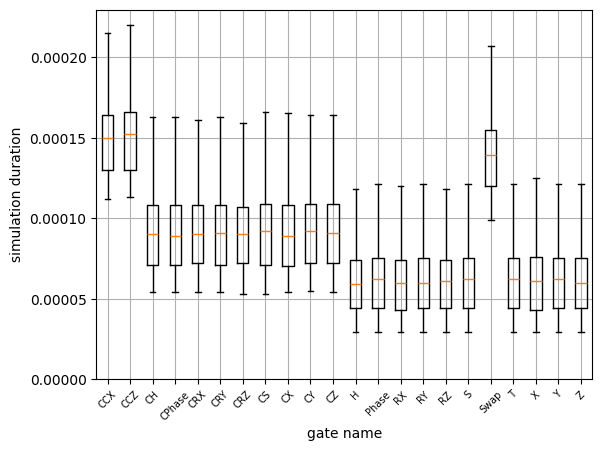

Simulation durations of gates for 6 qubits:


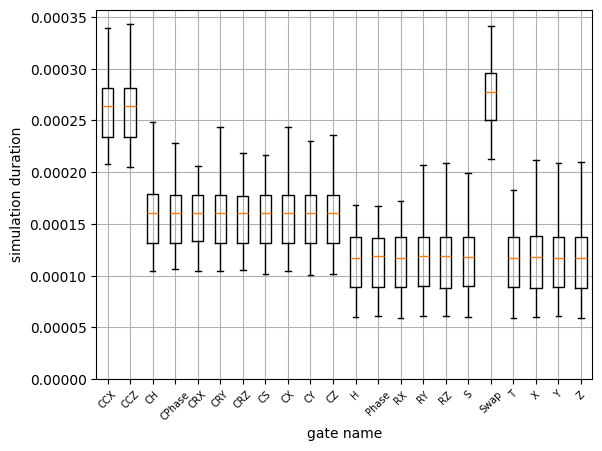

Simulation durations of gates for 7 qubits:


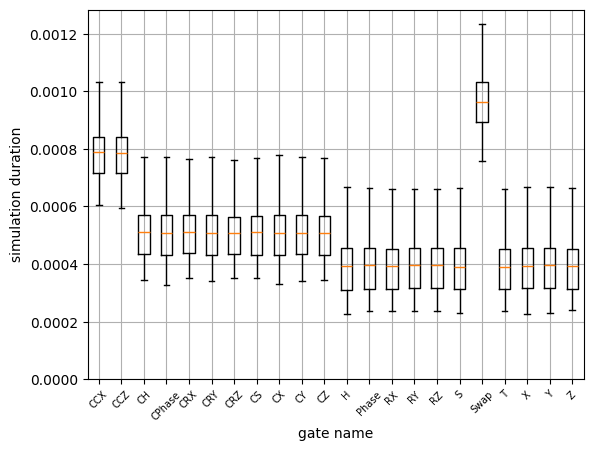

Simulation durations of gates for 8 qubits:


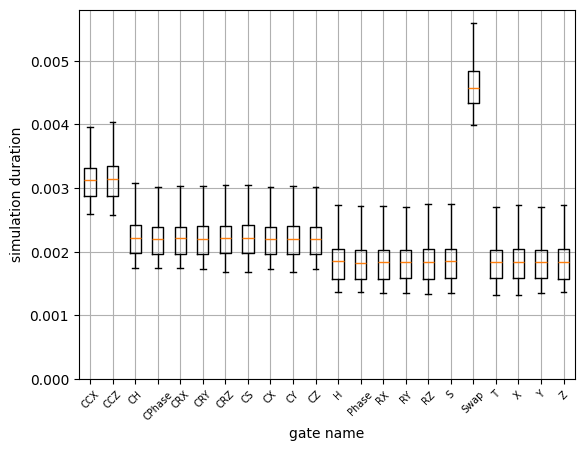

In [6]:
for qubit_num in qubit_nums:
    sel_experiment = experiments[qubit_num]

    gate_names = list(sel_experiment.keys())
    gate_names.sort()

    durations = []

    for gate_name in gate_names:

        gate_durations = sel_experiment[gate_name]
        durations.append(gate_durations)

    fig, ax = plt.subplots()

    ax.boxplot(durations, showfliers=False)

    ax.set_xlabel("gate name")
    ax.set_ylabel("simulation duration")
    ax.set_ylim(0)

    plt.xticks([i + 1 for i in range(len(gate_names))], gate_names, fontsize=7, rotation=45)

    printb(f"Simulation durations of gates for {qubit_num} qubits:")

    plt.grid()

    plt.savefig(f"{target_dir}/gate_sim_{qubit_num}q.png")
    plt.show()

Sample count of each gate for 3 qubits:


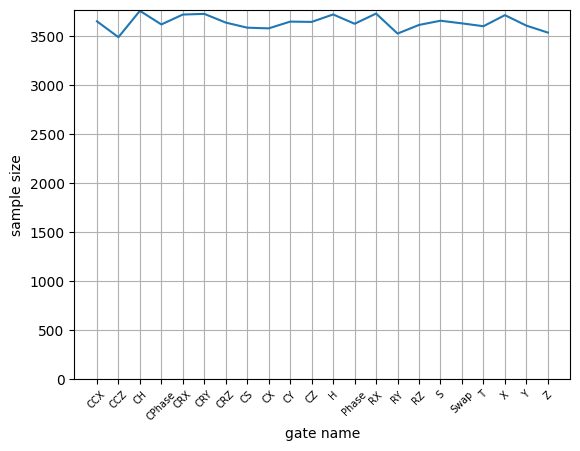

Sample count of each gate for 4 qubits:


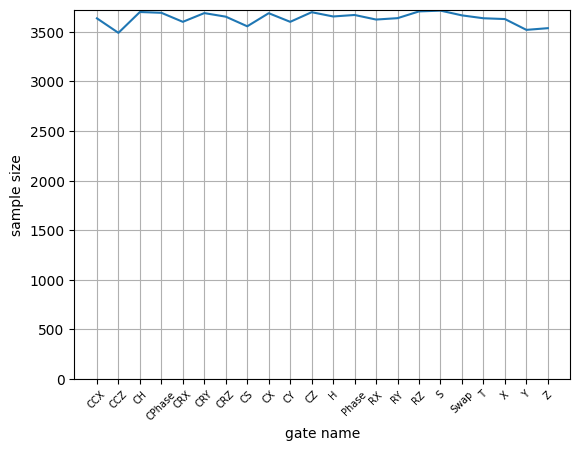

Sample count of each gate for 5 qubits:


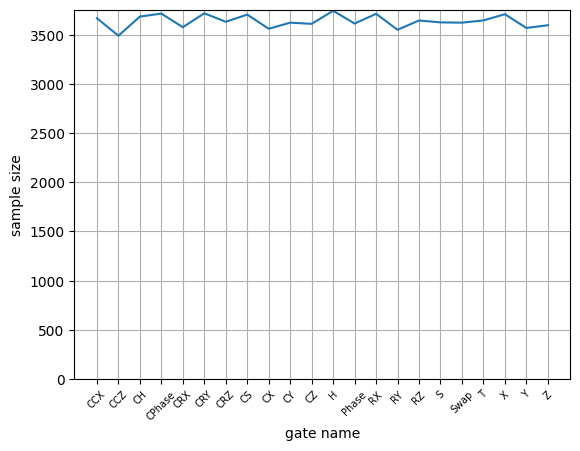

Sample count of each gate for 6 qubits:


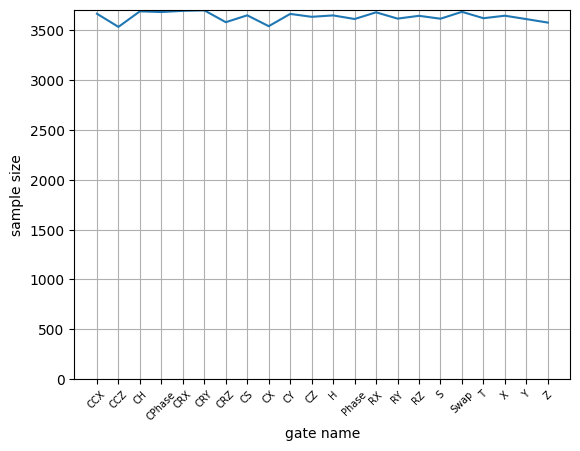

Sample count of each gate for 7 qubits:


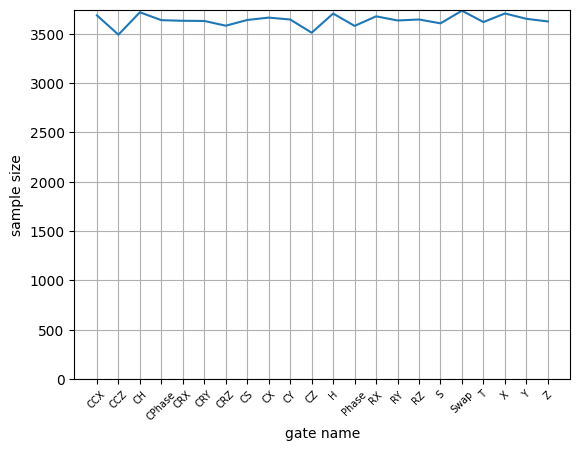

Sample count of each gate for 8 qubits:


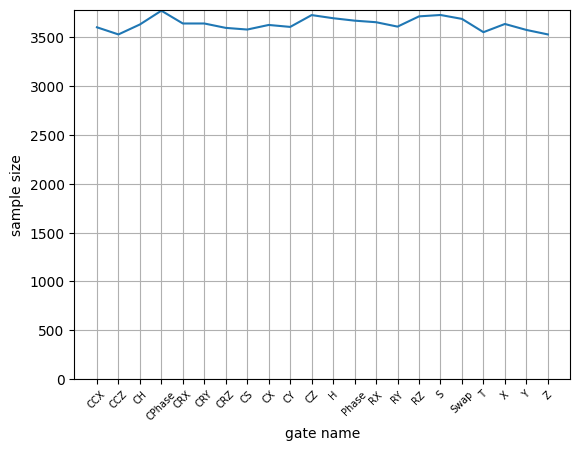

In [7]:
for qubit_num in qubit_nums:
    sel_experiment = experiments[qubit_num]

    gate_names = list(sel_experiment.keys())
    gate_names.sort()

    sample_counts = [
        len(sel_experiment[gate_name]) for gate_name in gate_names
    ]

    fig, ax = plt.subplots()

    ax.plot([i + 1 for i in range(len(gate_names))], sample_counts)

    ax.set_xlabel("gate name")
    ax.set_ylabel("sample size")
    ax.set_ylim(0)

    plt.xticks([i + 1 for i in range(len(gate_names))], gate_names, fontsize=7, rotation=45)

    printb(f"Sample count of each gate for {qubit_num} qubits:")

    plt.grid()

    # plt.savefig(f"{target_dir}/gate_sim_{qubit_num}q.png")
    plt.show()